# OpenCV Basics

## Getting and Setting Pixels
Python과 OpenCV를 이용하여 Pixel값을 가져오고 설정하는 방법을 설명드리겠습니다.

**Pixel(픽셀)이란?**  
픽셀(=화소)은 화면을 구성하는 가장 기본이 되는 단위입니다. 디지털 이미지의 경우 수많은 타일의 모자이크 그림과 같은 사각형의 픽셀로 이루어져 있습니다. 

대부분의 픽셀은 두 가지 방식으로 표현됩니다.
* Grayscale/single channel
* Color

**Grayscale** 이미지에서 각 픽셀은 0에서 255 사이의 값을 가지여, 0은 ```검정```에 해당하고 255는 ```흰색```에 해당합니다.  
0에서 255 사이의 값은 다양한 회색 음영으로, 0에 가까울수록 더 어둡고 255에 가까울수록 더 밝아집니다.
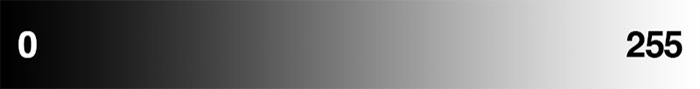

Color 픽셀은 일반적으로 **RGB** 색상 공간으로 표현됩니다. 하나의 픽셀은 Red, Green, Blue 이렇게 총 3개의 요소로 구성되어 있습니다.  
*(RGB이외에도 HSV(색조, 채도, 값), L*a*b* 등이 있습니다.)*

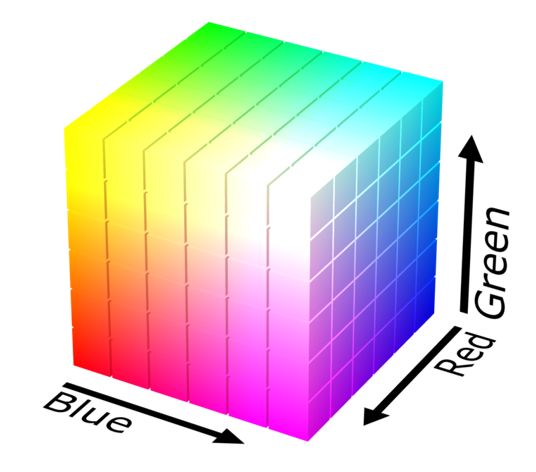

값의 형식은 RGB튜플(Red, Green, Blue)로 되어 있으며, 각 색상은 0에서 255사의 정수로 표시됩니다. 이 수치는 각 색생의 강도를 나타냅니다.  
예를들어 빨간색인 경우 (255, 0, 0), 파랑색은 (0, 0, 255) 이런식이죠. 흰색은 모든 색상이 존재하기 때문에 (255, 255, 255) 이며, 반대로 검정은 (0,  0, 0) 입니다.

이미지는 픽셀 격자로 표시됩니다. 그리드 또는 모눈종이를 생각하시면 됩니다.

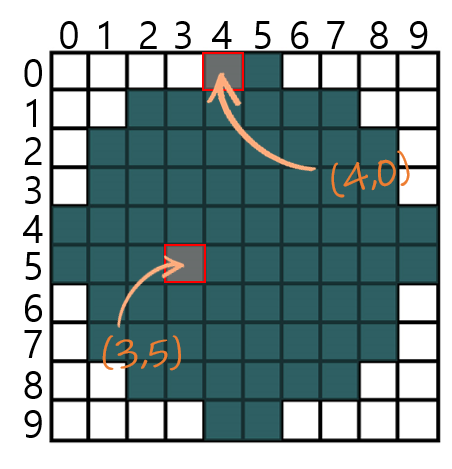

### Import packages

In [9]:
import cv2
import matplotlib.pyplot as plt

Function to display images in Jupyter Notebooks and Google Colab

In [13]:
def img_show(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)

    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []

            for i in range(len(img)):
                titles.append(title)

        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)

            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])

        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

### Load Image

In [28]:
cv2_image = cv2.imread('asset/images/test_image.jpg', cv2.IMREAD_COLOR)

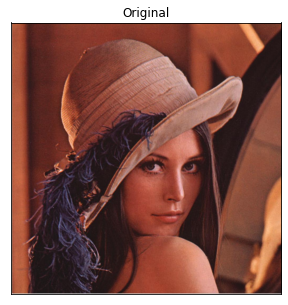

이미지 사이즈 : (1028, 1024, 3)
이미지 dtype : uint8
이미지 Height : 1028
이미지 Width : 1024
이미지 전체 픽셀 개수 : 3158016


In [37]:
(h, w) = cv2_image.shape[:2]
img_show("Original", cv2_image)

print('이미지 사이즈 : {}'.format(cv2_image.shape))
print('이미지 dtype : {}'.format(cv2_image.dtype))
print('이미지 Height : {}'.format(cv2_image.shape[0]))
print('이미지 Width : {}'.format(cv2_image.shape[1]))
print('이미지 전체 픽셀 개수 : {}'.format(cv2_image.size))

### Getting Pixels

imread(filename, flags)함수를 사용하여 이미지를 불러옵니다. image의 타입은 Numpy 배열(numpy.ndarray) 입니다.  
(0, 0) 픽셀의 RGB 값을 확인합니다.

In [30]:
(b, g, r) = cv2_image[0, 0]
print("Pixel at (0, 0) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

Pixel at (0, 0) - Red: 210, Green: 224, Blue: 237


### Setting Pixels
특정 픽셀값을 Update 할 수 있습니다. 

In [35]:
# x=512, y=516
(b, g, r) = cv2_image[512, 516]
print("Pixel at (512, 516) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

cv2_image[512, 516] = (0, 0, 255)
(b, g, r) = cv2_image[512, 516]
print("Changed Pixel at (512, 516) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

Pixel at (512, 516) - Red: 255, Green: 0, Blue: 0
Changed Pixel at (512, 516) - Red: 255, Green: 0, Blue: 0


NumPy 배열을 사용하고 있기 때문에 배열 슬라이싱을 적용하여 이미지의 왼쪽 상단 모서리영역을 잡을 수 있습니다.

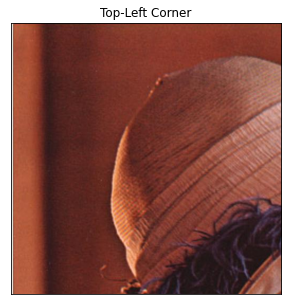

In [40]:
# 이미지의 중심을 계산
(cX, cY) = (w//2, h//2)

# 이미지의 왼쪽 상단 모서리 (y1:y2, x1:x2)
tl = cv2_image[0:cY, 0:cX]
img_show("Top-Left Corner", tl)

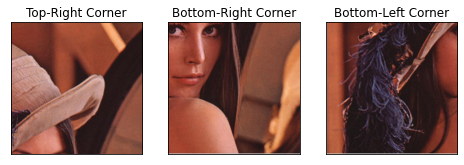

In [41]:
tr = cv2_image[0:cY, cX:w]
br = cv2_image[cY:h, cX:w]
bl = cv2_image[cY:h, 0:cX]
img_show(["Top-Right Corner", "Bottom-Right Corner", "Bottom-Left Corner"], [tr, br, bl])

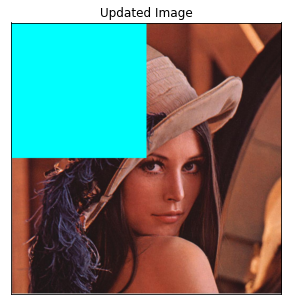

In [42]:
cv2_image[0:cY, 0:cX] = (255, 255, 0)

# Show our updated image
img_show("Updated Image", cv2_image)